In [160]:
import numpy as np 

class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    def Cost(self,x, y):
        tmp = y*(x@self.w)
        return sum([max(0, 1 - i) for i in tmp])
    
    
    def fit(self, x, y):
        tmp_y = np.array([-1 if i<=0 else 1 for i in y])
        self.w = np.random.randn(x.shape[1])
        self.b = 0
        for _ in range(self.n_iters):
            for i,j in enumerate(x):
                md = tmp_y[i]*(j @ self.w - self.b)
                d_w = None
                d_b = None
                if md >= 1:
                    d_w = (2*self.lambda_param)*self.w
                    d_b = 0
                else:
                    d_w = (2*self.lambda_param)*self.w - tmp_y[i] * j
                    d_b = tmp_y[i]
                self.w -= self.lr * d_w
                self.b -= self.lr * d_b
                

    def predict(self, X):
        y_pred = X @ self.w - self.b
        return np.sign(np.array(y_pred))

In [161]:
from sklearn import datasets
import numpy as np 
X, y =  datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [163]:
svm = SVM(n_iters=1000, learning_rate=0.01)
svm.fit(X_train, y_train)

In [164]:
y_pred = svm.predict(X_test)
y_pred

array([-1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.])

In [165]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

1.0

[0.55742113 0.19058973] -0.2840000000000002
0.28341036557692845


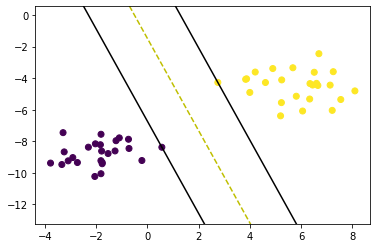

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y =  datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y)
#predictions = clf.predict(X)
 
print(clf.w, clf.b)
print(clf.Cost(X, y))

def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.show()

visualize_svm()